In [1]:
import numpy as np
import pandas as pd

In [2]:
# getting true news file
true_df = pd.read_csv("D:\Masters\Sem 3\Text analysis\Data\midterm\True.csv")
true_df['lable'] = 1 # adding the lable 
true_df.head()

,title,text,subject,date,lable
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [3]:
# getting fake news file 
fake_df = pd.read_csv("D:\Masters\Sem 3\Text analysis\Data\midterm\Fake.csv")
fake_df['lable'] = 0 # adding the lable 
fake_df.head()

,title,text,subject,date,lable
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [4]:
# combining both files 
df = pd.concat([true_df, fake_df], ignore_index=True)
df.head()

,title,text,subject,date,lable
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [5]:
df.columns

Index(['title', 'text', 'subject', 'date', 'lable'], dtype='object')

In [6]:
df['lable'].value_counts()

lable
0    23481
1    21417
Name: count, dtype: int64

In [7]:
# pre-processing
import nltk
nltk.download('punkt_tab') # for word tokens 
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer # stemming

ps = PorterStemmer()

# stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def tokens(review):
    clean_text = BeautifulSoup(str(review), 'html.parser').get_text() # this will remove HTML tags
    tokens = nltk.word_tokenize(str(clean_text)) # tokenize the cleaned text
    cleaned_token = [t for t in tokens if t.lower() not in stop_words and t.isalnum()] # only getting tokens which are not in stop words and are not numbers
    cleaned_token = [ps.stem(t) for t in cleaned_token] # stemming each tokens 
    return cleaned_token

df['Cleaned_tokens'] = df['text'].apply(tokens)
df.head()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cappr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cappr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\cappr\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\cappr\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


,title,text,subject,date,lable,Cleaned_tokens
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"[washington, reuter, head, conserv, republican..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,"[washington, reuter, transgend, peopl, allow, ..."
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,"[washington, reuter, special, counsel, investi..."
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,"[washington, reuter, trump, campaign, advis, g..."
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,"[reuter, presid, donald, trump, call, postal, ..."


In [8]:
from collections import Counter

all_words = [] # list to store all the words
# loop to get each words into a list
for words in df['Cleaned_tokens']:
    all_words.extend(words)

word_counts = Counter(all_words) # counting the words
print(word_counts.most_common(5)) # displaying top 5 words


[('said', 130186), ('trump', 128724), ('state', 60316), ('presid', 56451), ('would', 54987)]


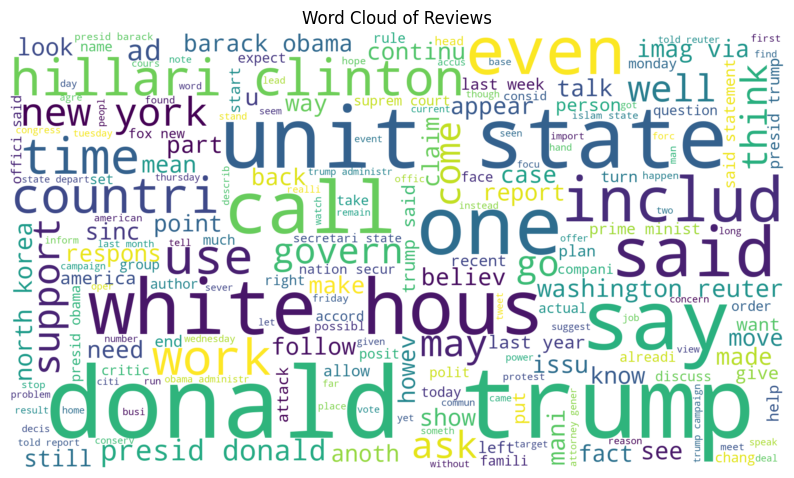

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all words into a single string
text_string = ' '.join(all_words)

# word cloud
wordcloud = WordCloud(width=1920, height=1080, background_color='white').generate(text_string)

# Displaying the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()


In [10]:
df.shape

(44898, 6)

In [11]:
df.columns

Index(['title', 'text', 'subject', 'date', 'lable', 'Cleaned_tokens'], dtype='object')

In [12]:
# shuffling the dataset
shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [13]:
shuffled_df.shape

(44898, 6)

In [14]:
shuffled_df.head()

,title,text,subject,date,lable,Cleaned_tokens
0,BREAKING: GOP Chairman Grassley Has Had Enoug...,"Donald Trump s White House is in chaos, and th...",News,"July 21, 2017",0,"[donald, trump, white, hous, chao, tri, cover,..."
1,Failed GOP Candidates Remembered In Hilarious...,Now that Donald Trump is the presumptive GOP n...,News,"May 7, 2016",0,"[donald, trump, presumpt, gop, nomine, time, r..."
2,Mike Pence’s New DC Neighbors Are HILARIOUSLY...,Mike Pence is a huge homophobe. He supports ex...,News,"December 3, 2016",0,"[mike, penc, huge, homophob, support, convers,..."
3,California AG pledges to defend birth control ...,SAN FRANCISCO (Reuters) - California Attorney ...,politicsNews,"October 6, 2017",1,"[san, francisco, reuter, california, attorney,..."
4,AZ RANCHERS Living On US-Mexico Border Destroy...,Twisted reasoning is all that comes from Pelos...,politics,"Apr 25, 2017",0,"[twist, reason, come, pelosi, day, especi, 200..."


In [15]:
# getting only required columns for model 
final_df = shuffled_df[['Cleaned_tokens','lable']]
final_df.head()

,Cleaned_tokens,lable
0,"[donald, trump, white, hous, chao, tri, cover,...",0
1,"[donald, trump, presumpt, gop, nomine, time, r...",0
2,"[mike, penc, huge, homophob, support, convers,...",0
3,"[san, francisco, reuter, california, attorney,...",1
4,"[twist, reason, come, pelosi, day, especi, 200...",0


In [16]:
# spliting data into train test data 
from sklearn.model_selection import train_test_split

X = final_df['Cleaned_tokens']
y = final_df['lable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
y_train.value_counts()

lable
0    18812
1    17106
Name: count, dtype: int64

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35918,)
(8980,)
(35918,)
(8980,)


In [19]:
# tfidf vecotorization 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=.01, max_df=.99, max_features=10_000, lowercase=False)
X_train2= vectorizer.fit_transform([" ".join(x) for x in X_train])
X_test2 = vectorizer.transform([" ".join(x) for x in X_test])

In [20]:
X_train2.shape

(35918, 2487)

In [21]:
X_test2.shape

(8980, 2487)

In [22]:
# nural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():  
    model = models.Sequential()
    model.add(layers.Dense(2487, activation='relu', input_shape=(X_train2.shape[1],)))
    model.add(layers.Dropout(.3))
    model.add(layers.Dense(1200, activation='relu'))
    model.add(layers.Dropout(.3))
    model.add(layers.Dense(600, activation='relu'))
    model.add(layers.Dropout(.3))
    model.add(layers.Dense(1, activation='sigmoid')) # 1 output because it binary classification (either 0 or 1)
    # sigmoid activation because we dont want prob of all class like softmax, we want the actual class label
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.metrics.Recall(), 'accuracy'])      
    return model
model = build_model()
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2487)              6187656   
                                                                 
 dropout (Dropout)           (None, 2487)              0         
                                                                 
 dense_1 (Dense)             (None, 1200)              2985600   
                                                                 
 dropout_1 (Dropout)         (None, 1200)              0         
                                                                 
 dense_2 (Dense)             (None, 600)               720600    
                                                                 
 dropout_2 (Dropout)         (None, 600)               0         
                                                                 
 dense_3 (Dense)             (None, 1)               

In [23]:
# using kerasclassifire for classification purposes 
from scikeras.wrappers  import KerasClassifier

model = KerasClassifier(model=build_model, epochs=2, batch_size=32, metrics=['accuracy', 'recall'])  
modelfit = model.fit(X_train2.toarray(), y_train)

Epoch 1/2


1123/1123 [==============================] - 127s 112ms/step - loss: 0.0761 - recall_1: 0.9720 - accuracy: 0.9732
Epoch 2/2
1123/1123 [==============================] - 126s 112ms/step - loss: 0.0240 - recall_1: 0.9931 - accuracy: 0.9926


In [24]:
# getting model preditions 
predictedp = model.predict_proba(X_test2.toarray())[:, 1]  # Probability for class 1
predicted = (predictedp > 0.5).astype(int)  # Threshold at 0.5 for binary prediction
print("Predicted shape:", predicted.shape)
print("Predicted values sample:", predicted[:10])

281/281 [==============================] - 2s 7ms/step
Predicted shape: (8980,)
Predicted values sample: [1 0 0 1 0 0 1 1 0 1]


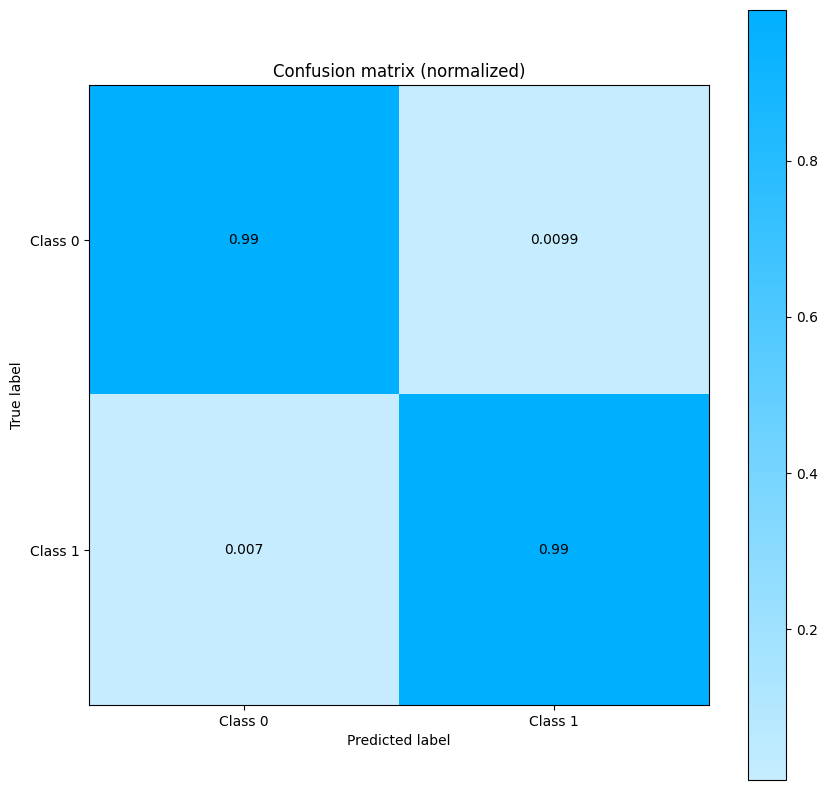

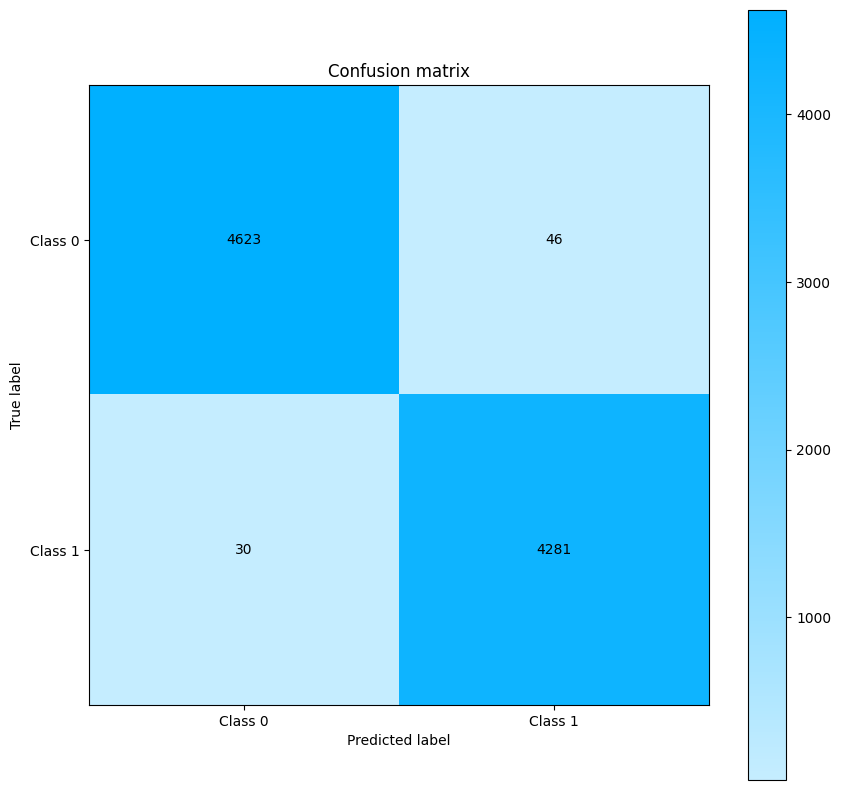

Acc:  0.9915367483296214
Precision:  0.991460812313548
Recall:  0.9915944205052261
f1 score:  0.9915244550667212


In [25]:
# ploting the confusion matrix 
from sklearn_evaluation import plot
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = [10, 10]
       
plot.confusion_matrix(y_test, predicted, normalize=True)
plt.show()
plot.confusion_matrix(y_test, predicted, normalize=False)
plt.show()

print("Acc: ",accuracy_score(y_test, predicted))
print("Precision: ",precision_score(y_test, predicted, average='macro'))
print("Recall: ",recall_score(y_test, predicted,average='macro'))
print("f1 score: ",f1_score(y_test, predicted,average='macro'))


In [ ]:
"""
The deep nural network was not neccessory but i used it because i like it. The data set had so many stop word so removing
stop words and also converting it to the base form was a greate process for model preformance. The preprocessing part was 
not chalanging but it took bit long for me to get the right data for the model after that it was really easy to build the 
model and train it. I thing the model is currently perfoming well enough but if i want to improve in i will add more 
relevent data to current media and use random forest or boosting trees for this as they handle overfitting well, for deep
nueral network we require more data so using a gradient boosting tree is more prectical for this type of requirement.
"""